In [78]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv('./data/city_weather_data.csv')
df.drop('city_id', axis=1, inplace=True)

In [83]:
df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,hithadhoo,mv,-16.3990,85.6147,1518512780,83.20,100,68,5.39
1,cape town,za,-55.2946,5.1489,1518508800,84.20,48,0,10.29
2,tuatapere,nz,-57.3422,157.9908,1518512781,59.17,96,32,10.87
3,talnakh,ru,75.5434,92.4531,1518512782,-2.22,83,88,10.65
4,keti bandar,pk,22.4073,65.5781,1518512782,74.02,94,0,3.04


In [84]:
from geopy.geocoders import Nominatim

In [85]:
geolocator = Nominatim()

In [86]:
city_name = df.city_name.tolist()
city_country = df.country_code.tolist()

In [87]:
lats = []
lons = []
for n in range(len(df)):
        location = geolocator.geocode(city_name[n], city_country[n])
        try:
            lats.append(location[0].latitude)
            lons.append(location[0].longitude)
        except:
            lats.append(np.nan)
            lons.append(np.nan)

In [88]:
df.latitude = lats
df.longitude = lons

In [89]:
df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,hithadhoo,mv,1.795942,73.387552,1518512780,83.20,100,68,5.39
1,cape town,za,-33.928992,18.417396,1518508800,84.20,48,0,10.29
2,tuatapere,nz,-46.132310,167.690763,1518512781,59.17,96,32,10.87
3,talnakh,ru,69.491801,88.423893,1518512782,-2.22,83,88,10.65
4,keti bandar,pk,24.143880,67.451099,1518512782,74.02,94,0,3.04


In [90]:
df.to_csv('./data/city_weather_data_real.csv', index_label='city_id')

In [91]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

/Users/leonidas/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


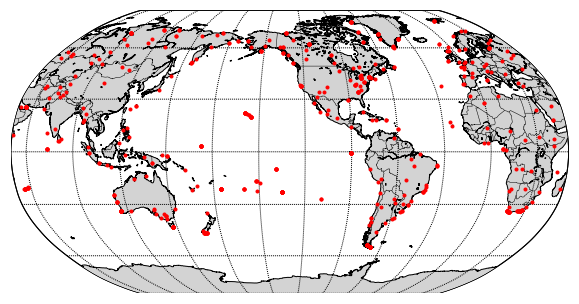

In [97]:
plt.figure(figsize=(10,8)) 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'lightgray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'ro', markersize=3)

plt.savefig('./../images/basemap_cities.png')
plt.show()